<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/TP1/PDI_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Color RGB**

Lo que hace que un objeto sea percibido con un determinado color responde, por una parte, a las propiedades de la luz incidente en el objeto, es decir, a las características de la radiación visible necesaria para iniciar todo proceso de visión humana (ya sea cromática o no). En segundo lugar, a las propiedades químicas de la materia de la que están formados los cuerpos, algo que afectará
sensiblemente a la interacción de la luz con estos últimos y, por último, al sistema visual humano que será el que determine la sensación cromática final percibida por nuestro cerebro, según las ondas de luz transmitidas o reflejadas por el objeto que han penetrado en el ojo humano (figura 2.1) [Gilabert, 1992]. Por este último factor, una determinada muestra de color no es percibida exactamente igual por dos observadores.[de https://rua.ua.es/dspace/bitstream/10045/10053/4/Ortiz-Zamora-Francisco-Gabriel_3.pdf]

Con el espacio cromático RGB es posible representar cada estímulo cromático  mediante la mezcla por adición de los tres colores (rojo, verde y azul) de luz primarios. Aunque los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos, ya que sus espacios de color pueden variar considerablemente.

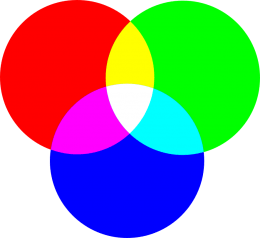


El valor de cada uno de los valores RGB está relacionado con el espectro electromagnético visible, y la energía que tenga el estímulo a cada una de las longitudes de onda del espectro.


#**Trabajo Práctico Nro. 1**
#Color RGB

#Consigna:
La actividad consiste en:
* Métodos para abrir una imagen de un archivo y disponer la información en una componente imagen. (tamaño, canales, formato, etc)
* Métodos para guardar la información de una componente imagen a un archivo.
* Métodos para acceder a una componente imagen y leer o modificar su contenido.
* Métodos para graficar o modificar una componente imagen.


Observaciones: se busca que desarrollen un código que permita abrir una imagen, conocer las características de esta, luego modificarla mediante alguna alteración en los canales RGB, graficarla y luego guardar el resultado como una imagen nueva.


#Para cumplir con la consigna:

* Se trabaja en primer lugar con una figura, sobre la cual se puede seleccionar un pixel para obtener el valor RGB.
* En la segunda parte se puede manipular el valor R, G y B de una imágen, adicionando algebráicamente valores. Además se guarda la imágen modificada.
* A modo de análisis, el una tercera parte, se generan figuras alterando los valores de RGB, y se realiza el cierre del práctico.

#Problemas surgidos:

* Quise que el valor máximo de los slices fuera seteado acorde  al tamaño de la imágen utilizada, pero no logré hacerlo.
* Quise vincular una imágen de GitHub a Colab, pero tampoco lo logré, intenté con ![]({url en colab}) sin suerte.
* No sé exactamente hasta dónde debería exponer de teoría, no quise ondar demasiado, por eso cité un trabajo muy completo que encontré. Tampoco supe bien hacia dónde orientar el análisis, supongo que eso lo iré puliendo con las correcciones de su parte.

In [1]:
#Librerías

import numpy as np
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#
#@title ## Image RGB
#@markdown You can upload your image or use mine: imageio:chelsea.png
#@markdown ---
#@markdown ### Enter an Image path:
file_path = "imageio:chelsea.png" #@param {type:"string"}
#@markdown ---

#Abro la img en PNG como un arreglo
im = imageio.imread(file_path)
print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )


Tamaño del arreglo (300, 451, 3) donde 300 x 451 es el tamaño de la imágen en píxeles, y  3 es el valor RGB de cada uno de dichos píxeles


In [3]:
#Funciones

def MuestraRGB(y,x):  #se ingresa el lugar del pixel y muestra una imágen que indica dónde está y otra donde se vé el color del pixel seleccionado
  imShowSelectedPixel=im.copy()
  #print('PixAncho=',x,'PixAlto= ',y)
  for i in range(3,20):
    for j in range(2,20):
      if (x+i<=im.shape[1])and (y>=0):imShowSelectedPixel[y,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y-j>=sTes0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x+i]=(52, 235, 207)
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=(52, 235, 207)
      if (x-i>=0)and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x-i]=(52, 235, 207)
  for i in range(1,3):
    for j in range(1,3):          
      if (x+i<im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=im[y,x]
      if (x+i<im.shape[1])and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x+i]=im[y,x]
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=im[y,x]
      if (x-i>=0)and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x-i]=im[y,x]
  
  print('Así se vé el pixel [',y,',',x,'] (ubicado en el centro del cuadrado cian) que contiene ',im[y,x][0],'Red, ',im[y,x][1],' Green, y ',im[y,x][2],' Blue.')
  fig = plt.figure(figsize=(10, 20))
  fig.add_subplot(1, 2, 2)
  plt.imshow([[im[y,x]]])
  fig.add_subplot(1, 2, 1)
  plt.imshow(imShowSelectedPixel)
  plt.show()


def ModifyRGB(im,R,G,B):  #Suma algebráicamente las constantes a los valores R, G y B de toda la imágen 
  imAlt=im.copy()
  imAlt[:,:,0]=imAlt[:,:,0]+R
  imAlt[:,:,0][imAlt[:,:,0]>255]=255
  imAlt[:,:,0][imAlt[:,:,0]<0]=0
  imAlt[:,:,1]=imAlt[:,:,1]+G
  imAlt[:,:,1][imAlt[:,:,1]>255]=255
  imAlt[:,:,1][imAlt[:,:,1]<0]=0
  imAlt[:,:,2]=imAlt[:,:,2]+B
  imAlt[:,:,2][imAlt[:,:,2]>255]=255
  imAlt[:,:,2][imAlt[:,:,2]<0]=0
  return imAlt



En alto: 118
En ancho: 165
PixAncho= 165 PixAlto=  118
Así se vé el pixel [ 118 , 165 ] (ubicado en el centro del cuadrado cian) que contiene  7 Red,  10  Green, y  3  Blue.


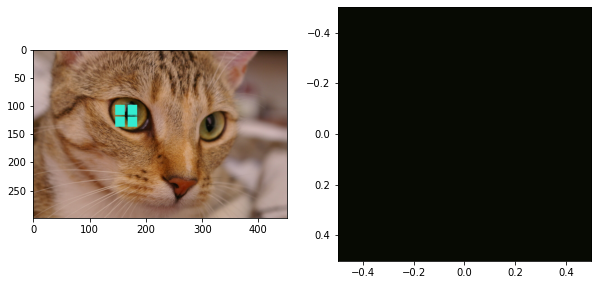

In [11]:
#@title ## Obtención de RGB de una imágen
#@markdown  Seleccione el lugar de la imágen cuyo RGB desea obtener

PixelX = 165 #@param {type:"slider", min:0, max:300, step:1}
PixelY = 118 #@param {type:"slider", min:0, max:450, step:1}


print('En alto:',PixelY)
print('En ancho:',PixelX)
MuestraRGB(PixelY,PixelX)

# Alterar componentes RGB
En el siguiente paso, se podrá sumar valor a las componentes RGB

Sumaremos  -30  al valor de Rojo,  -30  al valor de Verde y  -30  al valor de Azul
Los resultados los verás en la imágen de la derecha.


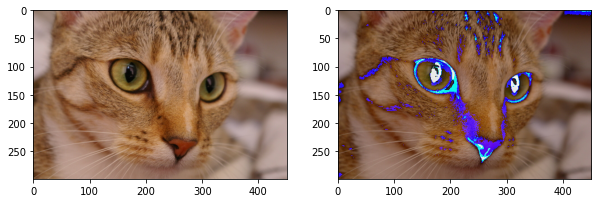

In [12]:
#@title ## Manipulación del  RGB de una imágen
#@markdown  Seleccione las constantes que desea adicionar al valor RGB de la imágen.

sumR = -30 #@param {type:"slider", min:-200, max:200, step:1}
sumG = -30 #@param {type:"slider", min:-200, max:200, step:1}
sumB = -30 #@param {type:"slider", min:-200, max:200, step:1}

print('Sumamos ',sumR ,' al valor de Rojo, ',sumG ,' al valor de Verde y ',sumB ,' al valor de Azul')
print('Los resultados los verás en la imágen de la derecha.')
imAlt=ModifyRGB(im,sumR,sumG,sumB)
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(imAlt)
plt.show()
#imageio.imsave('sample_data/imageAlterRGB.png', imAlt, '.png')

#Análisis del trabajo:
Como se puede y pudo ver, en general, al variar el color de la imágen, no cambia nuestra percepción del objeto.
Mientras los cambios son leves, se puede ver un contraste mayor o menor, dependiendo si se suma o resta una constante, pero al aumentar las constantes, se observan los colores fuertes (cian, magenta, verde, azul, violeta, amarillo).

Sumamos Rojo + 50  Verde +  50  y Azul +  50 en la Figura:  1
Sumamos Rojo + 50  Verde +  50  y Azul +  100 en la Figura:  2
Sumamos Rojo + 50  Verde +  50  y Azul +  150 en la Figura:  3
Sumamos Rojo + 50  Verde +  100  y Azul +  50 en la Figura:  4
Sumamos Rojo + 50  Verde +  100  y Azul +  100 en la Figura:  5
Sumamos Rojo + 50  Verde +  100  y Azul +  150 en la Figura:  6
Sumamos Rojo + 50  Verde +  150  y Azul +  50 en la Figura:  7
Sumamos Rojo + 50  Verde +  150  y Azul +  100 en la Figura:  8
Sumamos Rojo + 50  Verde +  150  y Azul +  150 en la Figura:  9
Sumamos Rojo + 100  Verde +  50  y Azul +  50 en la Figura:  10
Sumamos Rojo + 100  Verde +  50  y Azul +  100 en la Figura:  11
Sumamos Rojo + 100  Verde +  50  y Azul +  150 en la Figura:  12
Sumamos Rojo + 100  Verde +  100  y Azul +  50 en la Figura:  13
Sumamos Rojo + 100  Verde +  100  y Azul +  100 en la Figura:  14
Sumamos Rojo + 100  Verde +  100  y Azul +  150 en la Figura:  15
Sumamos Rojo + 100  Verde +  150  y Azu

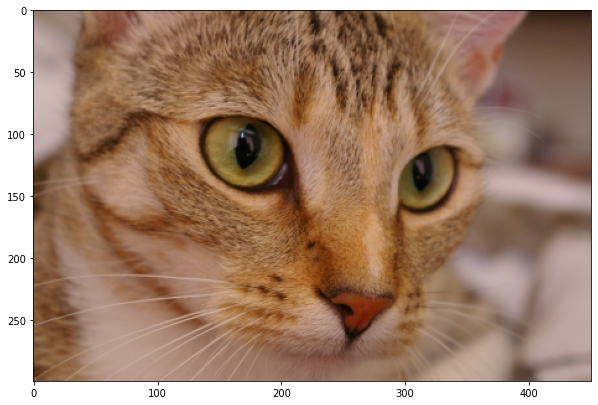

<Figure size 432x288 with 0 Axes>

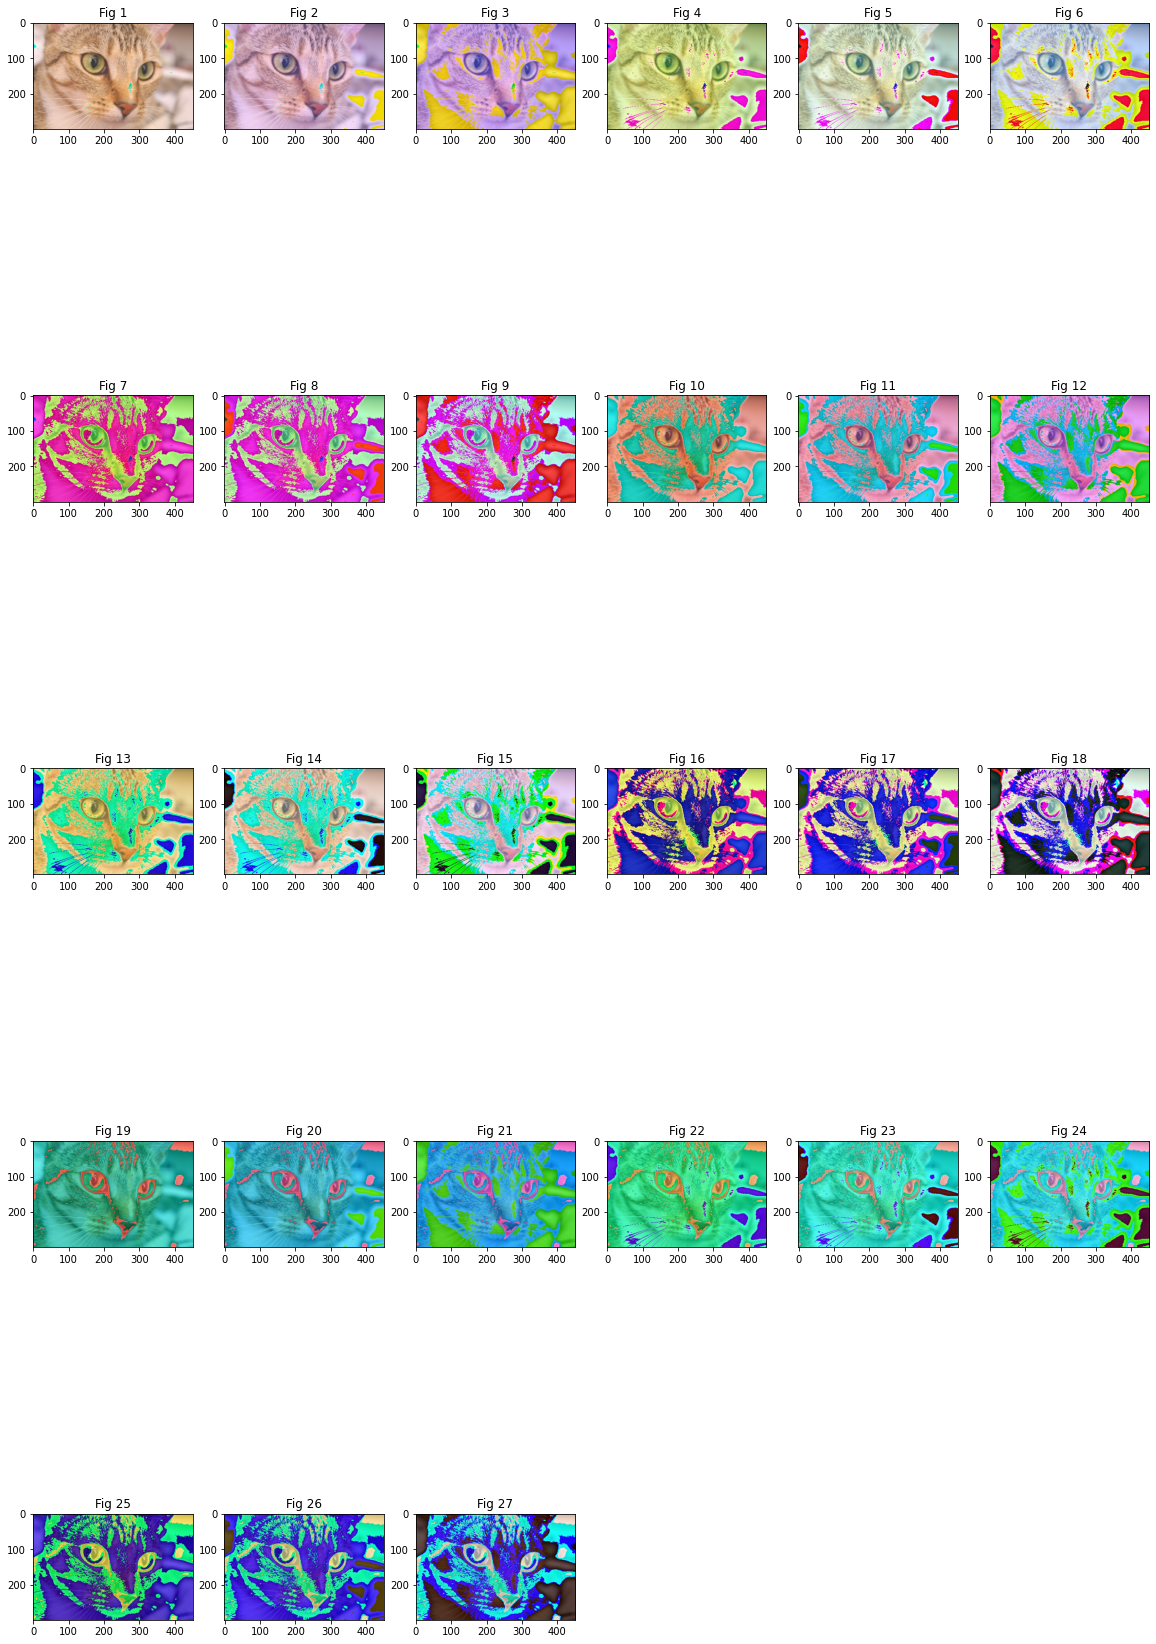

In [ ]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(im)
fig = plt.figure()
fig = plt.figure(figsize=(20, 40))
i=1

for sumR in list(range(50,151,50)): 
  
  for sumG in list(range(50,151,50)):
    for sumB in list(range(50,151,50)):
      print('Sumamos Rojo +',sumR ,' Verde + ',sumG ,' y Azul + ',sumB ,'en la Figura: ', i)
      
      fig.add_subplot(6, 6, i)
      imAlt=ModifyRGB(im,sumR,sumG,sumB)
      plt.imshow(imAlt)
      column='Fig '+str(i)
      plt.title(column)
      i=i+1

plt.show()